# Import Libraries

In [ ]:
pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

# Import Datasets

In [ ]:
od.download("https://www.kaggle.com/datasets/blastchar/telco-customer-churn")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shofidh
Your Kaggle Key: ··········


100%|██████████| 172k/172k [00:00<00:00, 56.7MB/s]

In [ ]:
df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Load Data

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df=df.loc[~df['TotalCharges'].str.contains(' ')]
df['TotalCharges']=df['TotalCharges'].astype(float)
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<ipython-input-7-218354edbaa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges']=df['TotalCharges'].astype(float)
<ipython-input-7-218354edbaa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen']=df['SeniorCitizen'].astype(object)


In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Insight Data:
1. Tidak ada missing value dan duplicate data di dalam dataset
2. Untuk kolom `SeniorCitizen` berisi nilai 0 dan 1, yang mengindikasikan apakah pelanggan tersebut adalah senior citizen (lanjut usia) atau tidak. Walaupun nilainya berupa angka, kolom ini akan dianggap sebagai variabel kategorikal sehingga diubah menjadi object supaya mudah dalam analisis.

# Statistic Summary

In [ ]:
categoricals= ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numericals= ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# categorical statistical sumary
df[categoricals].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
# value counts discrete columns
cols = categoricals
for col in cols:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Insight Data:
1. Categorical data
- kolom `customerID` memiliki nilai unik yang paling banyak
2. Numerical data
- Nilai minimum dan maksimum data kategori make sense untuk setiap kolom


# Univariate analysis

## Box Plot, outliers

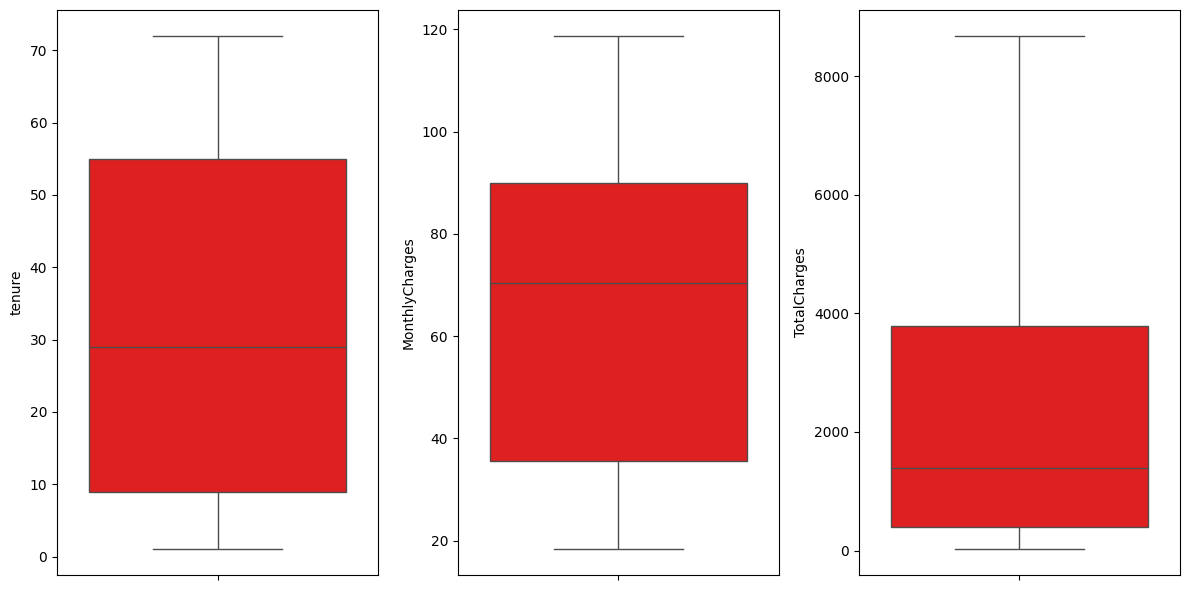

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Insight Data:
- Tidak ada data outlier untuk kolom `tenure`, `MonthlyCharges` dan `TotalCharges`

## KDE, Distibution Form

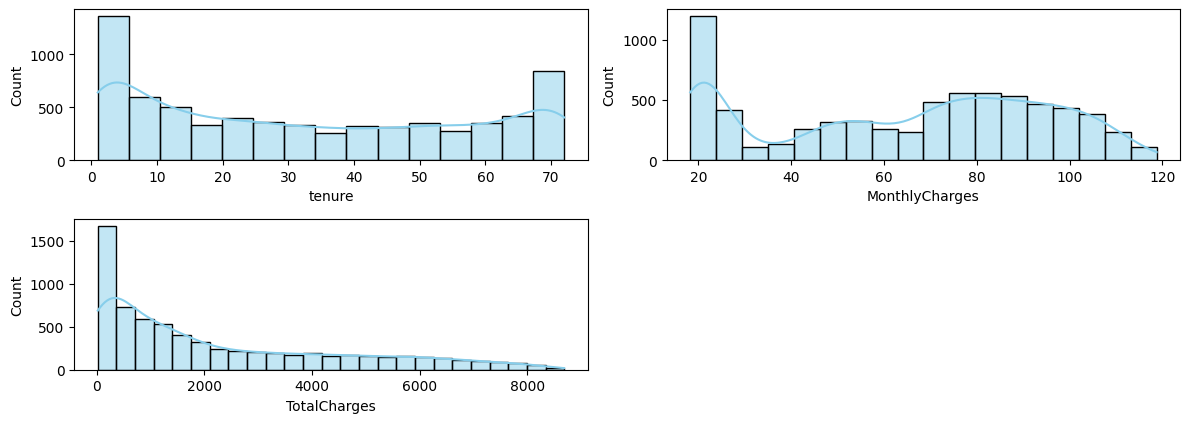

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(3, len(features)//2 + 1, i+1)
    #sns.kdeplot(x=data[features[i]], color='skyblue')
    sns.histplot(x=df[features[i]], color='skyblue', kde='True') #histogram +kde
    plt.xlabel(features[i])
    plt.tight_layout()

Insight Data:
   - Sebaran data pada kolom `tenure` menunjukkan adanya kelompok pelanggan dengan masa berlangganan yang sangat pendek atau sangat panjang.
   - Sebaran data untuk `MonthlyCharges` menunjukkan adanya kelompok pelanggan dengan biaya bulanan yang signifikan.
   - Sebaran data pada kolom `TotalCharges` dapat menunjukkan variasi besar dalam total biaya yang dibebankan kepada pelanggan.

# Multivariate analysis

## Count plot

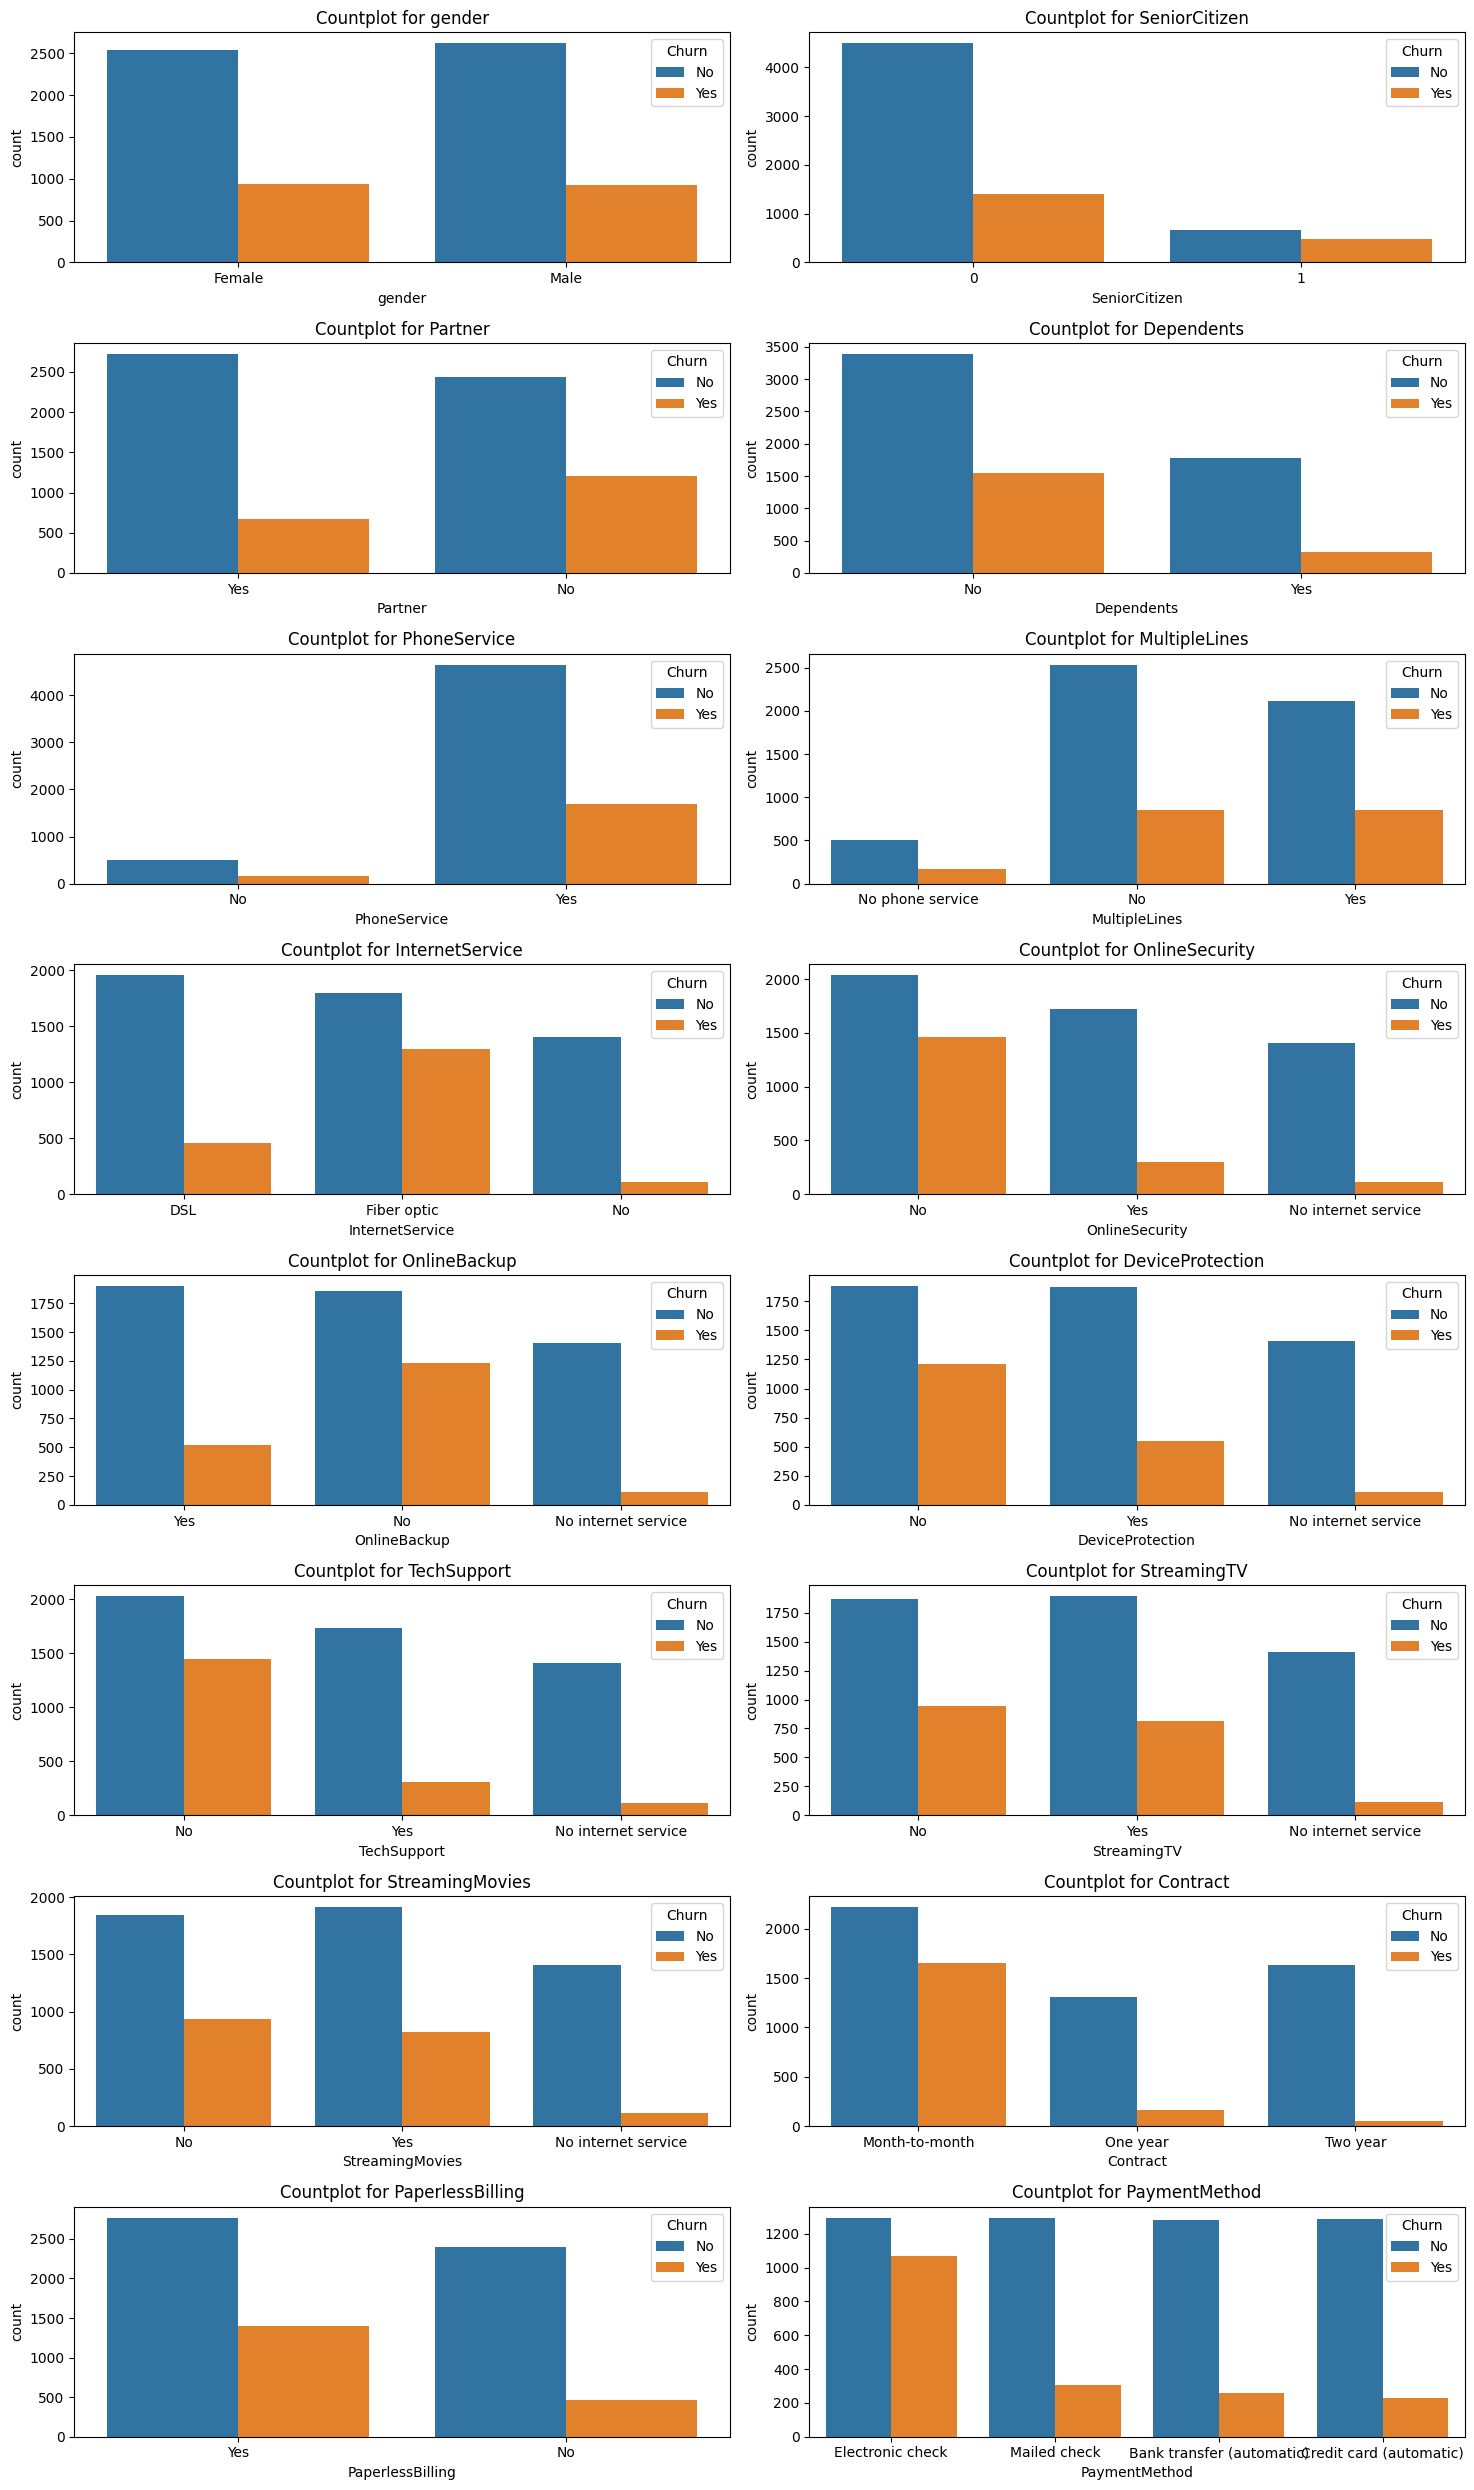

In [ ]:
categoricals1= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categoricals1)//2, ncols=2, figsize=(15, 25))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop over categorical variables and create count plots
for i, cat in enumerate(categoricals1):
    sns.countplot(data=df, x=cat, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Countplot for {cat}')

# Adjust layout
plt.tight_layout()
plt.show()

Insight Data:
- Jumlah pelanggan yang tidak melakukan Churn jauh lebih besar dibandingkan dengan pelanggan yang melakukan Churn.
- Baik gender female maupun male memiliki jumlah pengguna Churn yang relatif serupa.
- Jumlah pengguna yang melakukan Churn paling tinggi pada setiap kategori kolom adalah:
  - `SeniorCitizen`: 0
  - `Partner`: No
  - `Dependents`: No
  - `PhoneService`: Yes
  - `MultipleLines`: No
  - `InternetService`: Fiber Optic
  - `OnlineSecurity`: No
  - `OnlineBackup`: No
  - `DeviceProtection`: No
  - `TechSupport`: No
  - `StreamingTV`: No
  - `StreamingMovies`: No
  - `Contract`: Month-to-month
  - `PaperlessBilling`: Yes
  - `PaymentMethod`: Electronic check

## Heat map

<Axes: >

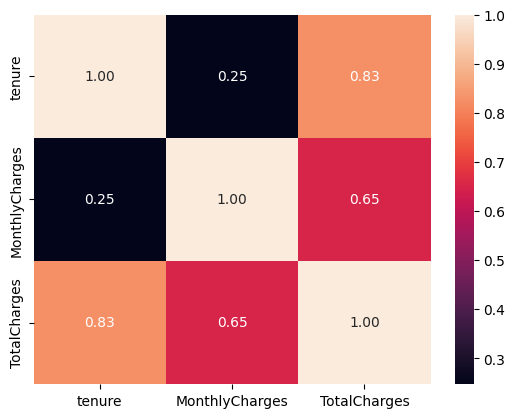

In [ ]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Insight Data:
   - Terdapat korelasi  positif antara `tenure`, `MonthlyCharges` dan `TotalCharges` yang artinya pelanggan dengan masa berlangganan yang lebih lama cenderung membayar biaya bulanan dan total biaya yang lebih tinggi.

## Pair plot

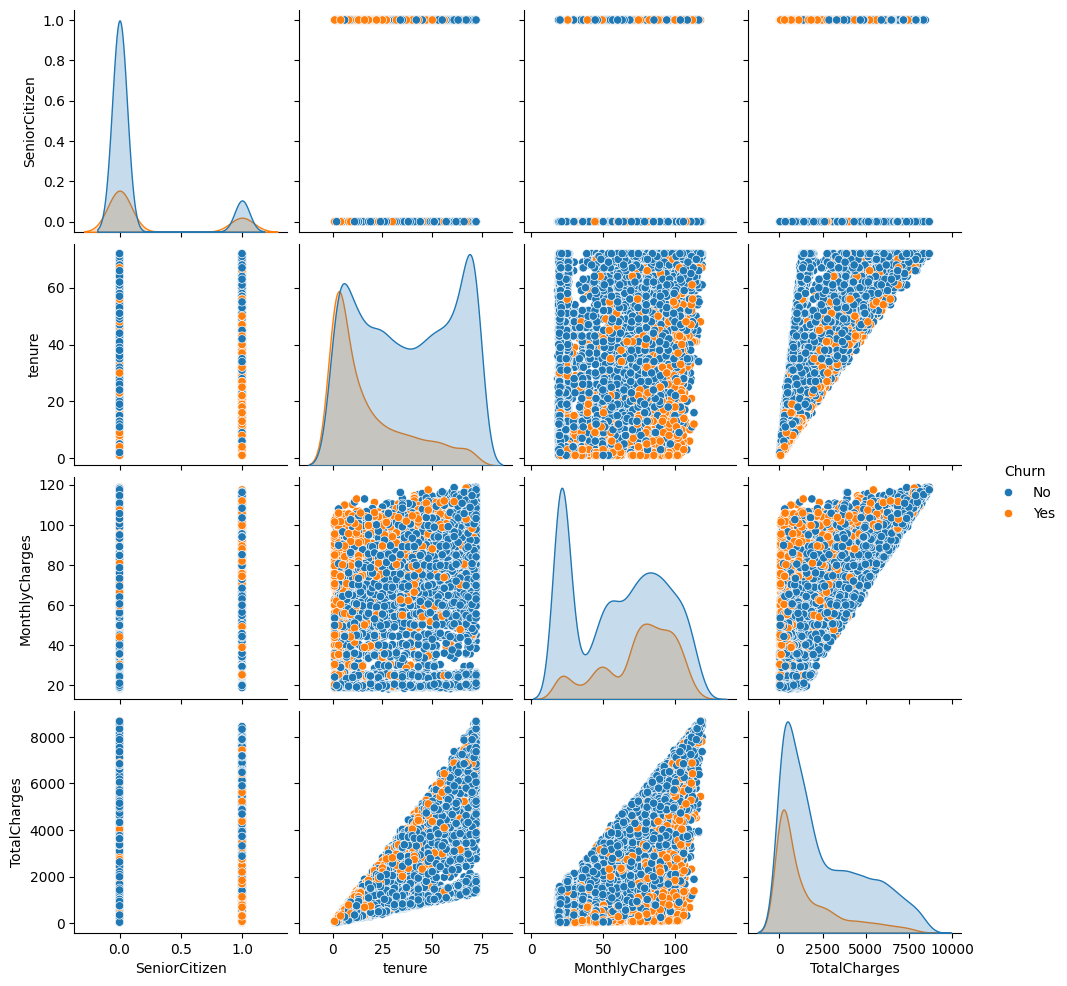

In [ ]:
sns.pairplot(df, hue='Churn')

Insight Data:
  - Mayoritas pengguna yang melakukan Churn adalah bukan `SeniorCitizen`, menunjukkan bahwa segmentasi non-lansia memiliki kecenderungan untuk lebih sering melakukan Churn.
  - Pelanggan yang cenderung melakukan Churn memiliki `tenure` (masa berlangganan) yang rendah, menandakan bahwa pelanggan baru atau yang tidak setia mungkin memiliki kecenderungan untuk lebih mungkin melakukan Churn.
  - Terdapat kecenderungan bahwa pengguna yang melakukan Churn memiliki `MonthlyCharges` (biaya bulanan) yang tinggi, menunjukkan sensitivitas pelanggan terhadap biaya bulanan yang tinggi.
  - `TotalCharges` yang rendah pada pengguna yang melakukan Churn menandakan bahwa mereka mungkin tidak menghabiskan waktu lama sebagai pelanggan dan mungkin telah melakukan Churn sebelum mencapai total biaya yang tinggi.


# Deep dive analysis

1. Berapakah rata-rata biaya bulanan pelanggan yang masih aktif dan pelanggan yang churn, serta berapa rata-rata tenur mereka, dengan mempertimbangkan variasi kontrak?

In [ ]:
avg_monthlycharges=(df
                  .groupby(['Contract','Churn'])
                  .agg(avg_monthlycharges=('MonthlyCharges','mean'),
                       avg_tenure=('tenure','mean'),
                       cont_costumers=('customerID','count'))
)
avg_monthlycharges

avg_monthlycharges  avg_tenure  cont_costumers
Contract       Churn                                                
Month-to-month No              61.462635   21.033333            2220
               Yes             73.019396   14.016918            1655
One year       No              62.540926   41.705972            1306
               Yes             85.050904   44.963855             166
Two year       No              60.112798   56.948687            1637
               Yes             86.777083   61.270833              48

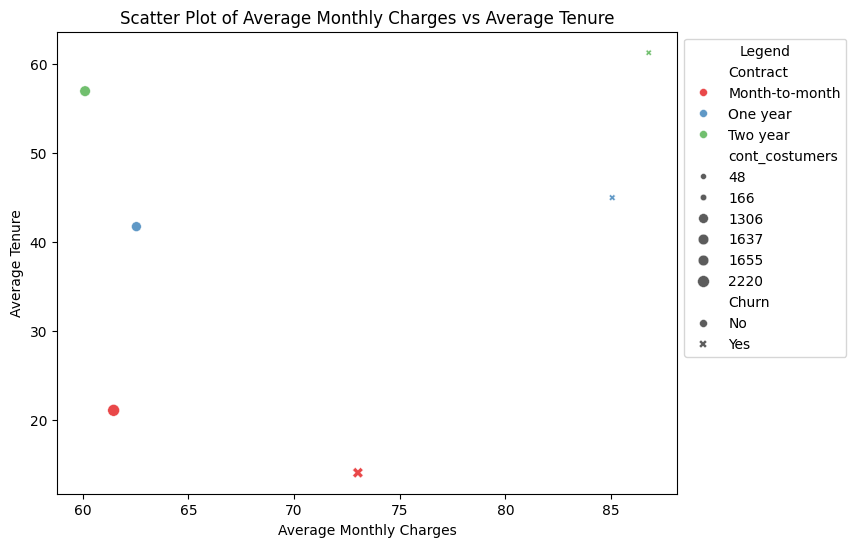

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create scatter plot
scatter_plot = sns.scatterplot(
    data=avg_monthlycharges,
    x='avg_monthlycharges', y='avg_tenure',
    hue='Contract', style='Churn', size='cont_costumers',
    s=32, alpha=0.8, palette='Set1'
)

# Adding labels and title
plt.xlabel('Average Monthly Charges')
plt.ylabel('Average Tenure')
plt.title('Scatter Plot of Average Monthly Charges vs Average Tenure')

# Move legend outside the plot
scatter_plot.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure with legend outside the box
plt.savefig('scatter_plot.png', bbox_inches='tight')

plt.show()


Insight Data:
- Pelanggan yang tidak Churn memiliki rata-rata `MonthlyCharges` yang rendah dibandingkan dengan pelanggan yang Churn, menunjukkan bahwa biaya bulanan yang lebih tinggi dapat menjadi faktor yang berkontribusi pada kecenderungan Churn.
- Terdapat sedikit pelanggan dengan masa berlangganan (`tenure`) yang lama yang melakukan Churn, menunjukkan bahwa pelanggan yang telah menggunakan layanan untuk waktu yang lama cenderung lebih setia dan kurang mungkin untuk melakukan Churn.
- Pelanggan dengan jenis kontrak `Month-to-Month` memiliki kecenderungan lebih tinggi untuk melakukan Churn, menunjukkan bahwa kontrak bulanan kurang mengikat, dan pelanggan lebih cenderung untuk beralih atau berhenti berlangganan.

2. Apa metode pembayaran yang paling umum digunakan oleh pelanggan, dan bagaimana implementasi paperless billing pada pelanggan tersebut?

In [ ]:
payment_method=(df
                  .groupby(['PaperlessBilling','PaymentMethod'])
                  .agg(cont_costumers=('customerID','count'))
                  .sort_values('cont_costumers',ascending=False)
)
payment_method

cont_costumers
PaperlessBilling PaymentMethod                            
Yes              Electronic check                     1742
No               Mailed check                          949
Yes              Bank transfer (automatic)             889
                 Credit card (automatic)               882
                 Mailed check                          655
No               Bank transfer (automatic)             653
                 Credit card (automatic)               639
                 Electronic check                      623

Insight Data:
- Pelanggan umumnya lebih sering menggunakan `PaymentMethod` Electronic check dibandingkan metode pembayaran lainnya.
- Implementasi `PaperlessBiling` telah mendominasi penggunaan di antara pelanggan, menunjukkan adopsi yang tinggi terhadap layanan penagihan tanpa kertas.

3. Apa kombinasi pelayanan yang paling banyak memiliki pelanggan Churn?

In [ ]:
df_Churn = df[df['Churn'] == 'Yes']

churn_services_customers = (
    df_Churn.groupby([
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies'
    ])
    .agg(cont_customers=('customerID', 'count'))
    .sort_values('cont_customers', ascending=False)
    .head(5)
)

churn_services_customers


cont_customers
PhoneService MultipleLines InternetService OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies                    
Yes          No            Fiber optic     No                  No                  No                  No                  No                  No                              138
                           No              No internet service No internet service No internet service No internet service No internet service No internet service             103
             Yes           Fiber optic     No                  No                  No                  No                  No                  No                              103
                                                                                                                           Yes                 Yes                              73
             No            DSL             No                  No                  No                  No                  No                  No                               70

Insight Data:
- Kombinasi layanan yang paling banyak digunakan di antara pelanggan Churn adalah menggunakan layanan `PhoneService` dan `InternetService` bertipe Fiber optic.

4. Apa jenis internet services paling banyak digunakan pelanggan yang Churn?

In [ ]:
internet_services = (
    df_churn.groupby(['InternetService'])
    .agg(
        cont_customers=('customerID', 'count'),
        avg_monthlycharges=('MonthlyCharges', 'mean'),
        min_monthlycharges=('MonthlyCharges', 'min'),
        max_monthlycharges=('MonthlyCharges', 'max')
    )
    .sort_values('cont_customers', ascending=False)
    .head(10)
)

internet_services


,cont_customers,avg_monthlycharges,min_monthlycharges,max_monthlycharges
InternetService,,,,
Fiber optic,1297,88.126484,67.75,118.35
DSL,459,49.083224,23.45,92.45
No,113,20.368142,18.85,25.90


Insight Data:
- Mayoritas pelanggan yang melakukan `Churn` memilih `InternetService` tipe Fiber optic, dan terdapat kecenderungan bahwa rata-rata `MonthlyCharges` pada layanan ini paling tinggi di antara pelanggan yang melakukan Churn.

In [ ]:
pip install pyppeteer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
